## Passenger Age vs. Suvival

This tutorial is based on the following resources:
* Introduction to Logistic Regression: https://medium.com/@anishsingh20/logistic-regression-in-python-423c8d32838b
* Data Visualization with Seaborn: https://www.datacamp.com/courses/data-visualization-with-seaborn?tap_a=5644-dce66f&tap_s=210732-9d6bbf
* Data Cleaning in Python: https://www.datacamp.com/courses/cleaning-data-in-python?tap_a=5644-dce66f&tap_s=210732-9d6bbf

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df.shape

(891, 12)

## Data Dictionary

1. PassengerID - type should be integers
2. Survived - survived or not
3. Pclass - class of Travel of every passenger
4. Name - the name of the passenger
5. Sex - gender
6. Age - age of passengers
7. SibSp - No. of siblings/spouse aboard
8. Parch - No. of parent/child aboard
9. Ticket - Ticket number
10. Fare - what Prices they paid
11. Cabin - cabin number
12. Embarked - the port in which a passenger has embarked. (C - Cherbourg , S -Southhampton , Q -Queenstown)

In [ ]:
df.count()

## Missing data

<AxesSubplot:>

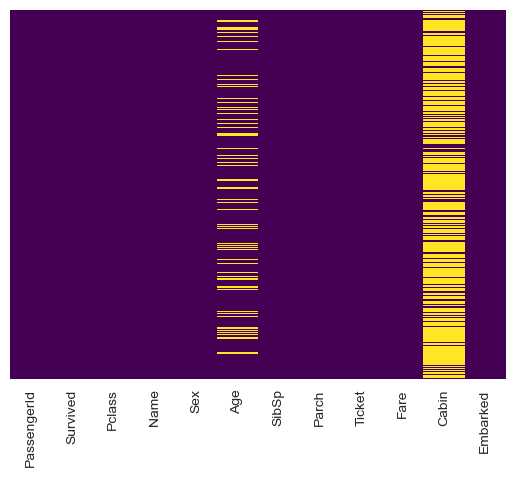

In [24]:
# We can use seaborn to create a simple heatmap to see where we are missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

* Roughly 20 percent of the Age data is missing. 
* The proportion of Age missing is likely small enough for reasonable replacement with imputation. 
* The Cabin column is just missing too much data. We can drop the column, or change it to another feature such as **"Cabin Known: 1 or 0"**

<AxesSubplot:xlabel='Survived', ylabel='count'>

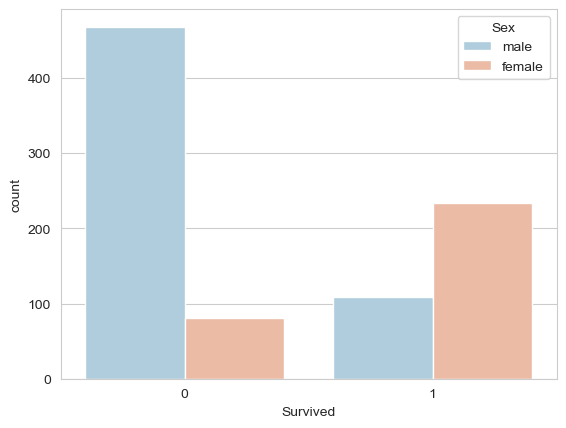

In [25]:
#count-plot of people survided 
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')

* People who did not survive were much more likely to be male 
* People who did survive were almost twice as likely to be female

<AxesSubplot:xlabel='Survived', ylabel='count'>

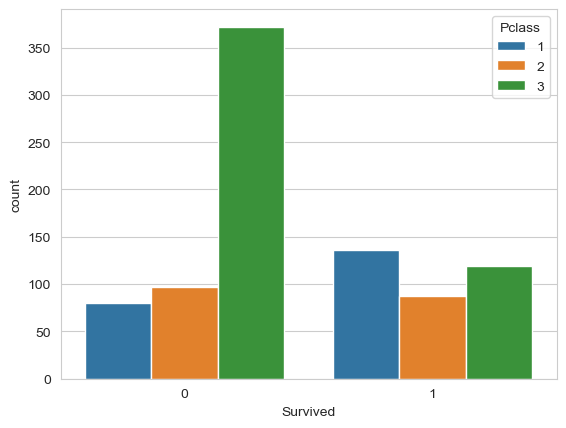

In [26]:
#no. of people who survived according to their Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=df)

* People who did not survive were more likely to be belonging to third class i.e the lowest class
* People who did survive were more likely to belong to higher classes

/Users/dbabichenko/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

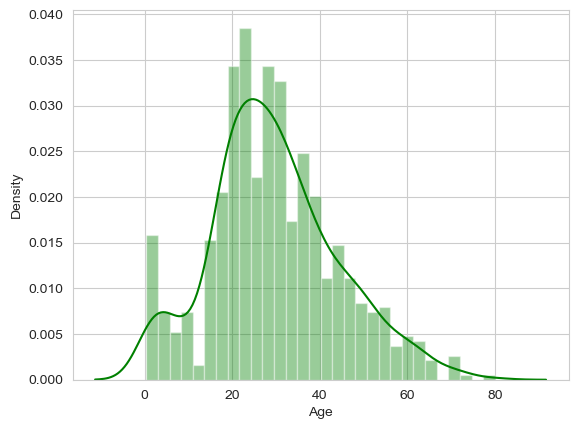

In [27]:
#distribution plot of age of the people
sns.distplot(df['Age'].dropna(), kde=True, bins=30, color='Green')

* The average age group of people to survive is somewhere between 20 to 30
* The older you get the less are chances of your survival

<AxesSubplot:xlabel='SibSp', ylabel='count'>

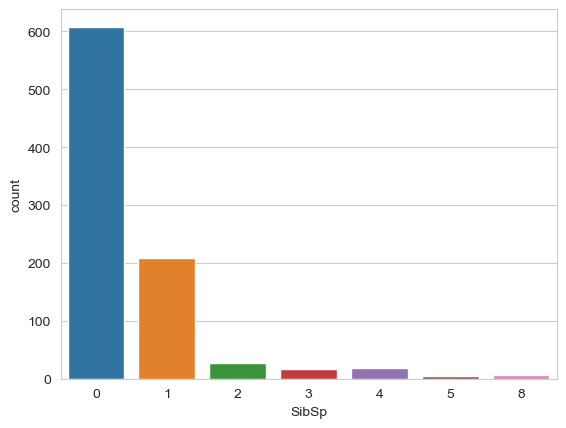

In [28]:
#countplot of the people having siblings or spouses
sns.countplot(x='SibSp',data=df)

* Most of the people on board are single (option 0) 
* The second most likely group is people with spouses (option 1)


<AxesSubplot:>

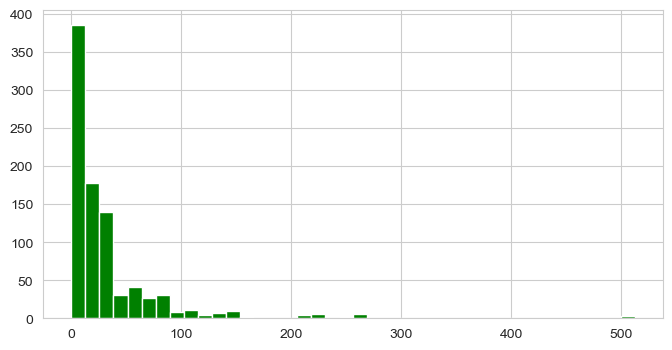

In [29]:
#distribution plot of the ticket fare
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

* Most of the purchase prices are between 0 and 50 
* Tickets are more distributed towards cheaper fare prices (most passengers are in cheaper third class)

## Data Cleaning

In [ ]:
#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

* The wealthier passengers in the higher classes tend to be older
* We’ll use the average age values to impute based on Pclass for Age

In [30]:
df.query('Pclass==1')['Age'].mean()

38.233440860215055

In [31]:
df.query('Pclass==2')['Age'].mean()

29.87763005780347

In [32]:
df.query('Pclass==3')['Age'].mean()

25.14061971830986

In [33]:
df.groupby('Pclass').agg({'Age':'mean'})

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [34]:
def impute_age(cols):
    age = cols[0]
    p_class = cols[1]
    
    if pd.isnull(age):
        if p_class == 1:
            return 38
        elif p_class == 2:
            return 29
        else:
            return 25
    else:
        return age # Return age without making any changes

<AxesSubplot:>

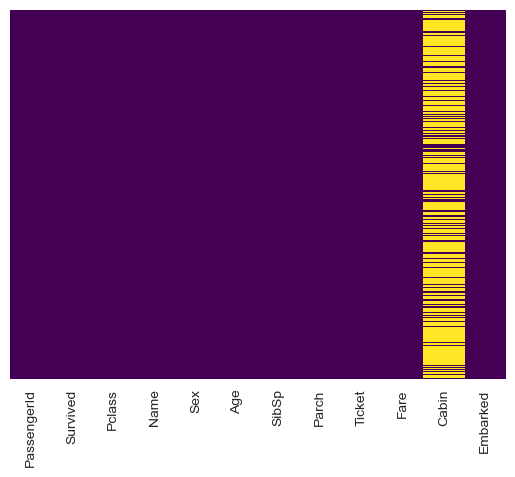

In [35]:
# Apply the impute_age function to the training dataset
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

# Check the heatmap again
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [36]:
# Drop the Cabin column and the row in Embarked that is NaN.
df.drop('Cabin',axis=1,inplace=True)
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
